# Previous Application Dataset Analysis

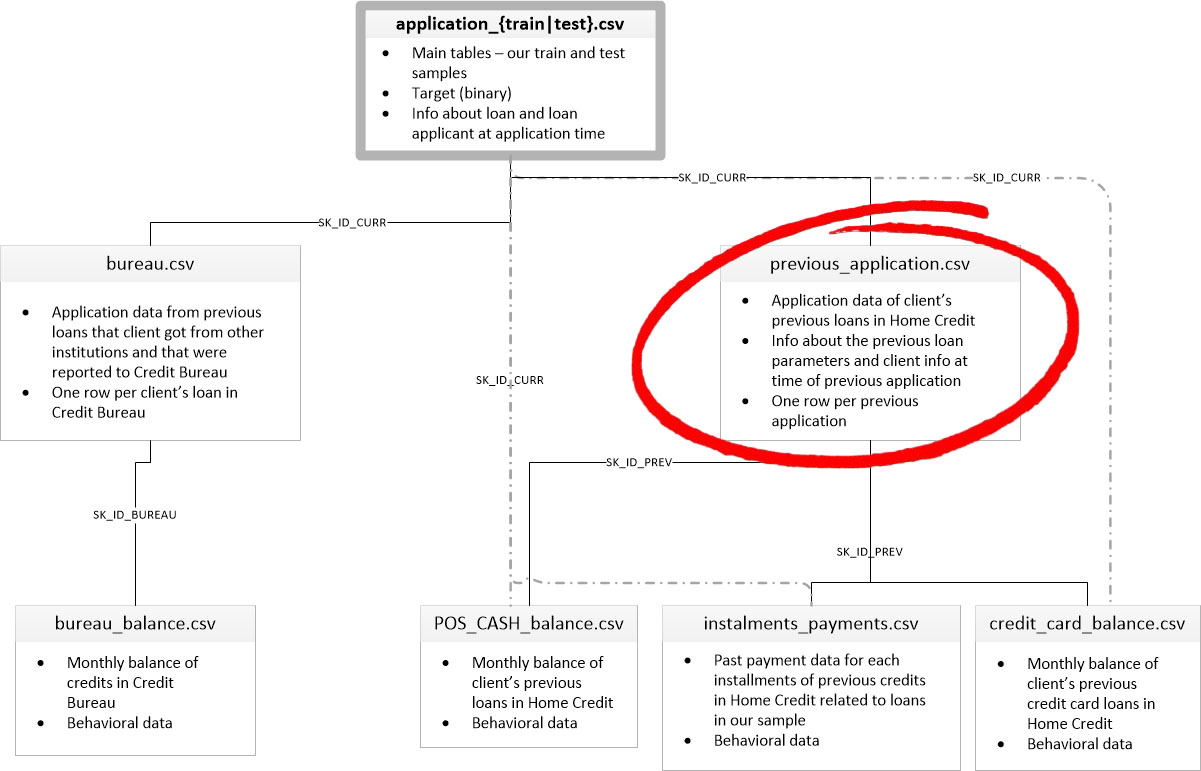

In this notebook I will try to explore previous_application dataset and see what we can take from it.

Here is a short description from home credit about this dataset:
* All previous applications for Home Credit loans of clients who have loans in our sample.
* There is one row for each previous application related to loans in our data sample.

# Import Libraries

In [36]:
%load_ext nb_black
import homecredit_functions as hc
import imp

imp.reload(hc)
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

sns.set(style="whitegrid", color_codes=True)
pd.set_option("display.float_format", lambda x: "%.5f" % x)

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

RANDOM_STATE = 0

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

# Load Processed Application Datasets

### Application Test Processed Dataset

In [2]:
path_application_test_proc = "data/application_test_proc.csv"
df_application_test_proc = pd.read_csv(path_application_test_proc)

<IPython.core.display.Javascript object>

In [3]:
df_application_test_proc.head(5)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,...,EXT_SOURCE_MIN,ANNUITY_CREDIT_RATIO,CREDIT_ANNUITY_RATIO,TARGET_NEIGHBORS_500_MEAN,GOODS_PRICE_AMT_ANNUITY_RATIO,GOODS_PRICE_AMT_INCOME_TOTAL_RATIO,GOODS_PRICE_AMT_CREDIT_RATIO,ANNUITY_DAYS_EMPLOYED_RATIO,ANNUITY_DAYS_BIRTH_RATIO,SK_ID_CURR
0,0.00000,0.00093,0.13079,0.25700,0.33754,0.04067,0.79045,0.88718,1.00000,1.00000,...,0.18150,0.13697,0.40086,0.11915,0.14272,0.03929,0.09607,0.99961,0.95603,100001
1,0.00000,0.00063,0.04439,0.49159,0.40389,0.03509,0.63043,0.77449,1.00000,1.00000,...,0.33184,0.43293,0.12210,0.25106,0.05407,0.02141,0.09867,0.99981,0.96073,100005
2,0.00000,0.00151,0.15437,0.26048,0.29262,0.03511,0.91184,0.51327,1.00000,1.00000,...,0.69517,0.62560,0.05975,0.03404,0.04381,0.03667,0.12049,0.99933,0.84987,100013
3,0.10526,0.00247,0.38202,0.36143,0.63433,0.04188,0.91894,0.41531,1.00000,1.00000,...,0.57990,0.10142,0.48475,0.05532,0.22152,0.05896,0.12821,0.99889,0.84877,100028
4,0.05263,0.00132,0.14494,0.13490,0.68709,0.04103,0.83787,0.40781,1.00000,1.00000,...,0.23000,0.24395,0.24761,0.23404,0.12441,0.04097,0.12821,0.99937,0.89487,100038


<IPython.core.display.Javascript object>

### Application Train Processed Dataset

In [4]:
path_application_train_proc = "data/application_train_proc.csv"
df_application_train_proc = pd.read_csv(path_application_train_proc)

<IPython.core.display.Javascript object>

In [5]:
df_application_train_proc.head(5)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,...,ANNUITY_CREDIT_RATIO,CREDIT_ANNUITY_RATIO,TARGET_NEIGHBORS_500_MEAN,GOODS_PRICE_AMT_ANNUITY_RATIO,GOODS_PRICE_AMT_INCOME_TOTAL_RATIO,GOODS_PRICE_AMT_CREDIT_RATIO,ANNUITY_DAYS_EMPLOYED_RATIO,ANNUITY_DAYS_BIRTH_RATIO,TARGET,SK_ID_CURR
0,0.00000,0.00151,0.09029,0.25632,0.88884,0.04509,0.85214,0.70543,1.00000,1.00000,...,0.31105,0.19041,0.54468,0.08367,0.02041,0.10717,0.99838,0.88820,1,100002
1,0.00000,0.00209,0.31174,0.04502,0.47711,0.04365,0.95193,0.95957,1.00000,1.00000,...,0.07648,0.56183,0.08511,0.21774,0.04932,0.10870,0.99874,0.90937,0,100003
2,0.00000,0.00036,0.02247,0.13490,0.34853,0.04616,0.82733,0.64833,1.00000,1.00000,...,0.23499,0.25688,0.05532,0.12821,0.02356,0.12821,0.99874,0.98744,0,100004
3,0.00000,0.00093,0.06684,0.10702,0.35085,0.03882,0.60145,0.66139,1.00000,1.00000,...,0.55299,0.07905,0.06809,0.05132,0.02592,0.12049,0.99957,0.93432,0,100006
4,0.00000,0.00082,0.11685,0.39288,0.29859,0.03882,0.82527,0.51952,1.00000,1.00000,...,0.18279,0.32191,0.15319,0.15483,0.04978,0.12821,0.99968,0.95478,0,100007


<IPython.core.display.Javascript object>

# EDA

### Previous Application Dataset

In [6]:
path_prev_application = "data/previous_application.csv"
df_prev_application = pd.read_csv(path_prev_application)

<IPython.core.display.Javascript object>

In [7]:
df_prev_application

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43000,17145.00000,17145.00000,0.00000,17145.00000,SATURDAY,15,...,Connectivity,12.00000,middle,POS mobile with interest,365243.00000,-42.00000,300.00000,-42.00000,-37.00000,0.00000
1,2802425,108129,Cash loans,25188.61500,607500.00000,679671.00000,nan,607500.00000,THURSDAY,11,...,XNA,36.00000,low_action,Cash X-Sell: low,365243.00000,-134.00000,916.00000,365243.00000,365243.00000,1.00000
2,2523466,122040,Cash loans,15060.73500,112500.00000,136444.50000,nan,112500.00000,TUESDAY,11,...,XNA,12.00000,high,Cash X-Sell: high,365243.00000,-271.00000,59.00000,365243.00000,365243.00000,1.00000
3,2819243,176158,Cash loans,47041.33500,450000.00000,470790.00000,nan,450000.00000,MONDAY,7,...,XNA,12.00000,middle,Cash X-Sell: middle,365243.00000,-482.00000,-152.00000,-182.00000,-177.00000,1.00000
4,1784265,202054,Cash loans,31924.39500,337500.00000,404055.00000,nan,337500.00000,THURSDAY,9,...,XNA,24.00000,high,Cash Street: high,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.29000,267295.50000,311400.00000,0.00000,267295.50000,WEDNESDAY,12,...,Furniture,30.00000,low_normal,POS industry with interest,365243.00000,-508.00000,362.00000,-358.00000,-351.00000,0.00000
1670210,2357031,334635,Consumer loans,6622.02000,87750.00000,64291.50000,29250.00000,87750.00000,TUESDAY,15,...,Furniture,12.00000,middle,POS industry with interest,365243.00000,-1604.00000,-1274.00000,-1304.00000,-1297.00000,0.00000
1670211,2659632,249544,Consumer loans,11520.85500,105237.00000,102523.50000,10525.50000,105237.00000,MONDAY,12,...,Consumer electronics,10.00000,low_normal,POS household with interest,365243.00000,-1457.00000,-1187.00000,-1187.00000,-1181.00000,0.00000
1670212,2785582,400317,Cash loans,18821.52000,180000.00000,191880.00000,nan,180000.00000,WEDNESDAY,9,...,XNA,12.00000,low_normal,Cash X-Sell: low,365243.00000,-1155.00000,-825.00000,-825.00000,-817.00000,1.00000


<IPython.core.display.Javascript object>

In [8]:
df_prev_application.dtypes.value_counts()

object     16
float64    15
int64       6
dtype: int64

<IPython.core.display.Javascript object>

In [9]:
df_prev_application.select_dtypes(["float64", "int64"]).describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,1670214.00000,1923089.13533,532597.95870,1000001.00000,1461857.25000,1923110.50000,2384279.75000,2845382.00000
SK_ID_CURR,1670214.00000,278357.17410,102814.82385,100001.00000,189329.00000,278714.50000,367514.00000,456255.00000
AMT_ANNUITY,1297979.00000,15955.12066,14782.13733,0.00000,6321.78000,11250.00000,20658.42000,418058.14500
AMT_APPLICATION,1670214.00000,175233.86036,292779.76239,0.00000,18720.00000,71046.00000,180360.00000,6905160.00000
AMT_CREDIT,1670213.00000,196114.02122,318574.61655,0.00000,24160.50000,80541.00000,216418.50000,6905160.00000
AMT_DOWN_PAYMENT,774370.00000,6697.40214,20921.49541,-0.90000,0.00000,1638.00000,7740.00000,3060045.00000
AMT_GOODS_PRICE,1284699.00000,227847.27928,315396.55794,0.00000,50841.00000,112320.00000,234000.00000,6905160.00000
HOUR_APPR_PROCESS_START,1670214.00000,12.48418,3.33403,0.00000,10.00000,12.00000,15.00000,23.00000
NFLAG_LAST_APPL_IN_DAY,1670214.00000,0.99647,0.05933,0.00000,1.00000,1.00000,1.00000,1.00000
RATE_DOWN_PAYMENT,774370.00000,0.07964,0.10782,-0.00001,0.00000,0.05161,0.10891,1.00000


<IPython.core.display.Javascript object>

In [10]:
df_prev_application.select_dtypes(["object"]).describe().T

,count,unique,top,freq
NAME_CONTRACT_TYPE,1670214,4,Cash loans,747553
WEEKDAY_APPR_PROCESS_START,1670214,7,TUESDAY,255118
FLAG_LAST_APPL_PER_CONTRACT,1670214,2,Y,1661739
NAME_CASH_LOAN_PURPOSE,1670214,25,XAP,922661
NAME_CONTRACT_STATUS,1670214,4,Approved,1036781
NAME_PAYMENT_TYPE,1670214,4,Cash through the bank,1033552
CODE_REJECT_REASON,1670214,9,XAP,1353093
NAME_TYPE_SUITE,849809,7,Unaccompanied,508970
NAME_CLIENT_TYPE,1670214,4,Repeater,1231261
NAME_GOODS_CATEGORY,1670214,28,XNA,950809


<IPython.core.display.Javascript object>

**Observation**:
* Datasets are mixed with numerical and categorical features
* Looks like SELLERPLACE_AREA has very high max value.

In [11]:
# Merge previous application dataset with application train dataset
df_prev_analysis = df_prev_application.merge(
    df_application_train_proc[["SK_ID_CURR", "TARGET"]], how="left", on="SK_ID_CURR"
)
df_prev_analysis.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET
0,2030495,271877,Consumer loans,1730.43000,17145.00000,17145.00000,0.00000,17145.00000,SATURDAY,15,...,12.00000,middle,POS mobile with interest,365243.00000,-42.00000,300.00000,-42.00000,-37.00000,0.00000,0.00000
1,2802425,108129,Cash loans,25188.61500,607500.00000,679671.00000,nan,607500.00000,THURSDAY,11,...,36.00000,low_action,Cash X-Sell: low,365243.00000,-134.00000,916.00000,365243.00000,365243.00000,1.00000,0.00000
2,2523466,122040,Cash loans,15060.73500,112500.00000,136444.50000,nan,112500.00000,TUESDAY,11,...,12.00000,high,Cash X-Sell: high,365243.00000,-271.00000,59.00000,365243.00000,365243.00000,1.00000,0.00000
3,2819243,176158,Cash loans,47041.33500,450000.00000,470790.00000,nan,450000.00000,MONDAY,7,...,12.00000,middle,Cash X-Sell: middle,365243.00000,-482.00000,-152.00000,-182.00000,-177.00000,1.00000,0.00000
4,1784265,202054,Cash loans,31924.39500,337500.00000,404055.00000,nan,337500.00000,THURSDAY,9,...,24.00000,high,Cash Street: high,nan,nan,nan,nan,nan,nan,0.00000


<IPython.core.display.Javascript object>

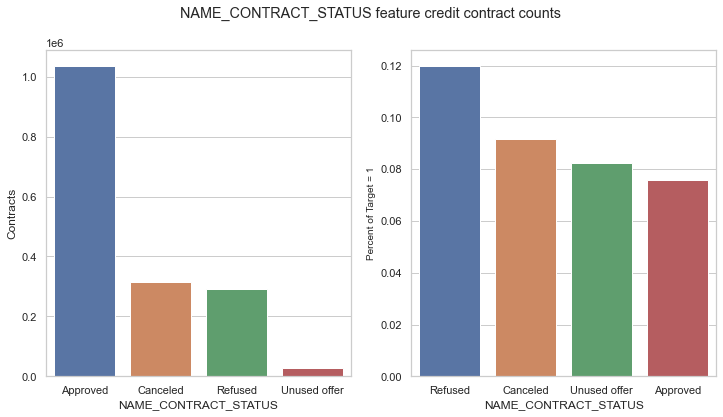

<IPython.core.display.Javascript object>

In [12]:
hc.plot_count(df_prev_analysis, "NAME_CONTRACT_STATUS")

**Observation**:
*  A majority of applicants had their Contract Status as Approved, followed by Canceled, Refused and Unused Offer.Looking at the percentage of defaulters for each category, we see that the applicants who had their previous applications refused and canceled have the highest defaulting tendency.

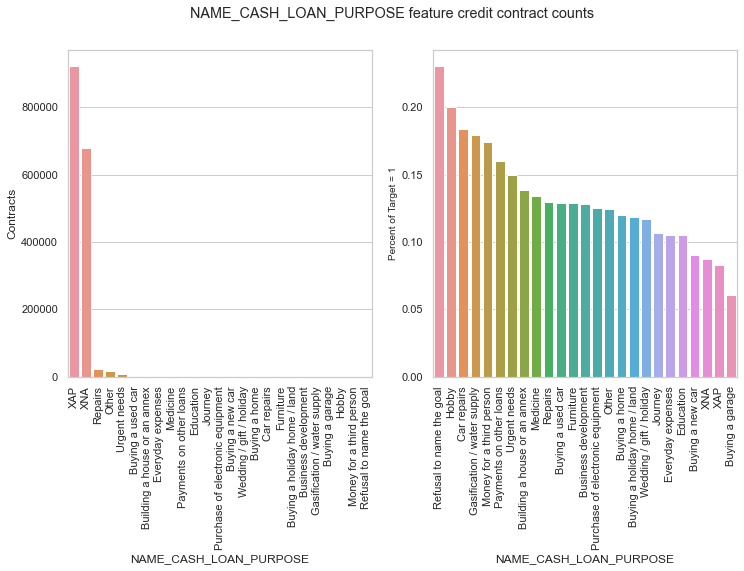

<IPython.core.display.Javascript object>

In [13]:
hc.plot_count(df_prev_analysis, "NAME_CASH_LOAN_PURPOSE", True)

**Observation**:
*   Clients with history of previous applications have largest percents of defaults when in their history are previous applications for cash loans for Refusal to name the goal -  about 23%, Hobby (20%), Car repairs (about 18%).

# Data Wrangling

## Correlation

### Correlation with target

In [14]:
corrs_prev_application = df_prev_analysis.corr()[["TARGET"]].sort_values(
    by="TARGET", ascending=False
)
corrs_prev_application = corrs_prev_application.rename(
    columns={"TARGET": "target_corr"}
)
corrs_prev_application = corrs_prev_application.drop(
    ["TARGET", "SK_ID_CURR", "SK_ID_PREV"]
)
corrs_prev_application

,target_corr
DAYS_DECISION,0.03990
CNT_PAYMENT,0.03048
RATE_INTEREST_PRIVILEGED,0.02864
DAYS_LAST_DUE_1ST_VERSION,0.01802
DAYS_LAST_DUE,0.01752
DAYS_TERMINATION,0.01698
NFLAG_INSURED_ON_APPROVAL,0.00065
AMT_GOODS_PRICE,0.00025
RATE_INTEREST_PRIMARY,-0.00147
AMT_CREDIT,-0.00235


<IPython.core.display.Javascript object>

As we can see there is not a lot of correlation going between our numerical features and target. Most correlated feature is days of decision which shows: "Relative to current application when was the decision about previous application made"

## Previous Application Split Train/Test

In [16]:
%%time
df_prev_application_agg  = hc.aggregate_samples(df_prev_application.drop(columns=["SK_ID_PREV"]),"PREV_")

Wall time: 35.6 s


<IPython.core.display.Javascript object>

In [17]:
df_prev_application_agg.head(5)

,SK_ID_CURR,PREV_AMT_ANNUITY_MEAN,PREV_AMT_APPLICATION_MEAN,PREV_AMT_CREDIT_MEAN,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_GOODS_PRICE_MEAN,PREV_HOUR_APPR_PROCESS_START_MEAN,PREV_NFLAG_LAST_APPL_IN_DAY_MEAN,PREV_RATE_DOWN_PAYMENT_MEAN,PREV_RATE_INTEREST_PRIMARY_MEAN,...,PREV_PRODUCT_COMBINATION_CashXSelllow_MEAN,PREV_PRODUCT_COMBINATION_CashXSellmiddle_MEAN,PREV_PRODUCT_COMBINATION_POShouseholdwithinterest_MEAN,PREV_PRODUCT_COMBINATION_POShouseholdwithoutinterest_MEAN,PREV_PRODUCT_COMBINATION_POSindustrywithinterest_MEAN,PREV_PRODUCT_COMBINATION_POSindustrywithoutinterest_MEAN,PREV_PRODUCT_COMBINATION_POSmobilewithinterest_MEAN,PREV_PRODUCT_COMBINATION_POSmobilewithoutinterest_MEAN,PREV_PRODUCT_COMBINATION_POSotherwithinterest_MEAN,PREV_PRODUCT_COMBINATION_POSotherswithoutinterest_MEAN
0,100001,3951.00000,24835.50000,23787.00000,2520.00000,24835.50000,13.00000,1.00000,0.10433,nan,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
1,100002,9251.77500,179055.00000,179055.00000,0.00000,179055.00000,9.00000,1.00000,0.00000,nan,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
2,100003,56553.99000,435436.50000,484191.00000,3442.50000,435436.50000,14.66667,1.00000,0.05003,nan,...,0.33333,0.00000,0.33333,0.00000,0.33333,0.00000,0.00000,0.00000,0.00000,0.00000
3,100004,5357.25000,24282.00000,20106.00000,4860.00000,24282.00000,5.00000,1.00000,0.21201,nan,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
4,100005,4813.20000,22308.75000,20076.75000,4464.00000,44617.50000,10.50000,1.00000,0.10896,nan,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.50000,0.00000,0.00000,0.00000


<IPython.core.display.Javascript object>

In [18]:
%%time
# Splitting into train/test sets
df_train_sliced = df_application_train_proc[["SK_ID_CURR", "TARGET"]]
df_test_sliced = df_application_test_proc[["SK_ID_CURR"]]

df_prev_application_train = df_train_sliced.merge(df_prev_application_agg,how='left', on='SK_ID_CURR')
df_prev_application_test = df_test_sliced.merge(df_prev_application_agg,how='left', on='SK_ID_CURR')

Wall time: 5.49 s


<IPython.core.display.Javascript object>

## Missing values

In [19]:
missing_values_train = hc.missing_values(df_prev_application_train)
missing_values_train

,Missing Values,% of Total Values
PREV_RATE_INTEREST_PRIVILEGED_MEAN,302902,98.50000
PREV_RATE_INTEREST_PRIMARY_MIN,302902,98.50000
PREV_RATE_INTEREST_PRIVILEGED_MIN,302902,98.50000
PREV_RATE_INTEREST_PRIMARY_MEAN,302902,98.50000
PREV_RATE_INTEREST_PRIVILEGED_MAX,302902,98.50000
...,...,...
PREV_NAME_CASH_LOAN_PURPOSE_Everydayexpenses_MEAN,16454,5.40000
PREV_NAME_CASH_LOAN_PURPOSE_Furniture_MEAN,16454,5.40000
PREV_NAME_CASH_LOAN_PURPOSE_Gasificationwatersupply_MEAN,16454,5.40000
PREV_NAME_CASH_LOAN_PURPOSE_Hobby_MEAN,16454,5.40000


<IPython.core.display.Javascript object>

### Drop Features Missing More Than 70%

In [20]:
drop_features = missing_values_train[
    missing_values_train["% of Total Values"] >= 70
].index
drop_features

Index(['PREV_RATE_INTEREST_PRIVILEGED_MEAN', 'PREV_RATE_INTEREST_PRIMARY_MIN',
       'PREV_RATE_INTEREST_PRIVILEGED_MIN', 'PREV_RATE_INTEREST_PRIMARY_MEAN',
       'PREV_RATE_INTEREST_PRIVILEGED_MAX', 'PREV_RATE_INTEREST_PRIMARY_MAX'],
      dtype='object')

<IPython.core.display.Javascript object>

In [21]:
df_prev_application_train_drop = df_prev_application_train.drop(columns=drop_features)
df_prev_application_test_drop = df_prev_application_test.drop(columns=drop_features)

<IPython.core.display.Javascript object>

## Impute Missing Values

In [22]:
%%time
df_prev_application_train_drop_imp, df_prev_application_test_drop_imp = hc.impute_missing_num(
df_prev_application_train_drop,df_prev_application_test_drop, df_prev_application_test_drop.columns
)

Wall time: 23.5 s


<IPython.core.display.Javascript object>

In [23]:
hc.missing_values(df_prev_application_train_drop_imp)

,Missing Values,% of Total Values


<IPython.core.display.Javascript object>

In [24]:
hc.missing_values(df_prev_application_test_drop_imp)

,Missing Values,% of Total Values


<IPython.core.display.Javascript object>

# Scale

In [25]:
df_train_full_scaled, df_test_full_scaled = hc.scale_minmax(
    df_prev_application_train_drop_imp,
    df_prev_application_test_drop_imp,
)

<IPython.core.display.Javascript object>

In [26]:
df_train_full_scaled.head(5)

,PREV_AMT_ANNUITY_MEAN,PREV_AMT_APPLICATION_MEAN,PREV_AMT_CREDIT_MEAN,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_GOODS_PRICE_MEAN,PREV_HOUR_APPR_PROCESS_START_MEAN,PREV_NFLAG_LAST_APPL_IN_DAY_MEAN,PREV_RATE_DOWN_PAYMENT_MEAN,PREV_DAYS_DECISION_MEAN,PREV_SELLERPLACE_AREA_MEAN,...,PREV_PRODUCT_COMBINATION_POShouseholdwithinterest_MEAN,PREV_PRODUCT_COMBINATION_POShouseholdwithoutinterest_MEAN,PREV_PRODUCT_COMBINATION_POSindustrywithinterest_MEAN,PREV_PRODUCT_COMBINATION_POSindustrywithoutinterest_MEAN,PREV_PRODUCT_COMBINATION_POSmobilewithinterest_MEAN,PREV_PRODUCT_COMBINATION_POSmobilewithoutinterest_MEAN,PREV_PRODUCT_COMBINATION_POSotherwithinterest_MEAN,PREV_PRODUCT_COMBINATION_POSotherswithoutinterest_MEAN,TARGET,SK_ID_CURR
0,0.03080,0.04421,0.04421,0.00000,0.04421,0.39130,1.00000,0.00001,0.79315,0.00013,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1,100002.00000
1,0.18825,0.10752,0.11955,0.00170,0.10752,0.63768,1.00000,0.05056,0.55377,0.00013,...,0.33333,0.00000,0.33333,0.00000,0.00000,0.00000,0.00000,0.00000,0,100003.00000
2,0.01783,0.00600,0.00496,0.00240,0.00600,0.21739,1.00000,0.21421,0.72158,0.00001,...,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0,100004.00000
3,0.07873,0.06721,0.07202,0.01721,0.10082,0.63768,1.00000,0.16511,0.90738,0.00022,...,0.11111,0.00000,0.11111,0.00000,0.00000,0.00000,0.00000,0.00000,0,100006.00000
4,0.04087,0.03717,0.04115,0.00167,0.03717,0.53623,1.00000,0.16118,0.58191,0.00010,...,0.16667,0.00000,0.00000,0.00000,0.16667,0.00000,0.00000,0.00000,0,100007.00000


<IPython.core.display.Javascript object>

# Baseline model

In [27]:
X_train_full = df_train_full_scaled.drop(columns=["TARGET", "SK_ID_CURR"])
X_test_full = df_test_full_scaled.drop(columns=["SK_ID_CURR"])

y_train_full = df_train_full_scaled["TARGET"]

<IPython.core.display.Javascript object>

In [30]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full,
    y_train_full,
    test_size=0.2,
    stratify=y_train_full,
    random_state=RANDOM_STATE,
)

<IPython.core.display.Javascript object>

### LGBM

In [28]:
LGBM_clsf = LGBMClassifier(
    class_weight="balanced", random_state=RANDOM_STATE, n_jobs=-1, metric="auc"
)

<IPython.core.display.Javascript object>

In [31]:
%%time
LGBM_clsf.fit(X_train, y_train)

Wall time: 14.2 s


LGBMClassifier(class_weight='balanced', metric='auc', random_state=0)

<IPython.core.display.Javascript object>

In [32]:
y_pred_train, y_pred_val = hc.get_binary_predictions(LGBM_clsf, X_train, X_val)
y_pred_train_prob, y_pred_val_prob = hc.get_prob_predictions(LGBM_clsf, X_train, X_val)

accuracy_score_train, accuracy_score_val = hc.get_accuracy_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
precision_score_train, precision_score_val = hc.get_precision_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
recall_score_train, recall_score_val = hc.get_recall_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
roc_auc_score_train, roc_auc_score_val = hc.get_roc_auc_score(
    y_train, y_pred_train_prob, y_val, y_pred_val_prob
)

Training accuracy is 0.6775958505414458
Validation accuracy is 0.6655447701738126
Training precision is 0.1546022819696512
Validation precision is 0.1351755739467901
Training recall is 0.6699899295065458
Validation recall is 0.5822759315206445
Training ROC AUC is 0.7411149261021858
Validation ROC AUC is 0.6722365625849516


<IPython.core.display.Javascript object>

In [33]:
df_scores = pd.DataFrame()

dict_scores = {
    "Model": ["LGBM"],
    "Notes": ["Baseline With All Features"],
    "Accuracy_train": [accuracy_score_train],
    "Accuracy_val": [accuracy_score_val],
    "Precision_train": [precision_score_train],
    "Precision_val": [precision_score_val],
    "Recall_train": [recall_score_train],
    "Recall_val": [recall_score_val],
    "ROC_AUC_train": [roc_auc_score_train],
    "ROC_AUC_val": [roc_auc_score_val],
}
df_scores = df_scores.append(pd.DataFrame(dict_scores))
df_scores

,Model,Notes,Accuracy_train,Accuracy_val,Precision_train,Precision_val,Recall_train,Recall_val,ROC_AUC_train,ROC_AUC_val
0,LGBM,Baseline With All Features,0.67760,0.66554,0.15460,0.13518,0.66999,0.58228,0.74111,0.67224


<IPython.core.display.Javascript object>

In [37]:
hc.get_importance(LGBM_clsf, X_train_full, 20)

,Feature,Weight
10,PREV_CNT_PAYMENT_MEAN,105
8,PREV_DAYS_DECISION_MEAN,70
187,PREV_PRODUCT_COMBINATION_CashXSelllow_MEAN,66
5,PREV_HOUR_APPR_PROCESS_START_MEAN,65
0,PREV_AMT_ANNUITY_MEAN,64
34,PREV_AMT_ANNUITY_MIN,58
177,PREV_NAME_YIELD_GROUP_high_MEAN,57
25,PREV_DAYS_DECISION_MAX,57
30,PREV_DAYS_LAST_DUE_1ST_VERSION_MAX,54
38,PREV_AMT_GOODS_PRICE_MIN,45


<IPython.core.display.Javascript object>

As we can see top most important feature is PREV_CNT_PAYMENT_MEAN which describes - "Term of previous credit at application of the previous application"

# Outliers

In [45]:
original_num_columns = [
    feature
    for feature in df_prev_application.drop(
        columns=[
            "SK_ID_PREV",
            "SK_ID_CURR",
            "RATE_INTEREST_PRIVILEGED",
            "RATE_INTEREST_PRIMARY",
        ]
    )
    if df_prev_application[feature].dtype in ["int64", "float64"]
]
num_columns = []
for column in original_num_columns:
    num_columns.append("PREV_" + column + "_MEAN")
    num_columns.append("PREV_" + column + "_MAX")
    num_columns.append("PREV_" + column + "_MIN")
    num_columns.append("PREV_" + column + "_SUM")

<IPython.core.display.Javascript object>

In [154]:
%%time
result = pd.DataFrame()
for feature in num_columns:    
    stats = hc.isolation_forest_feature(df_prev_application_train_drop_imp, feature)
    result = pd.concat([result, stats])

Wall time: 23min 34s


<IPython.core.display.Javascript object>

In [155]:
outliers = {
    team: grp.drop("feature", axis=1)
    for team, grp in result.sort_values(by="score").groupby("feature")
}

<IPython.core.display.Javascript object>

Because finding outliers for every features seperately took long time to compute we will save outliers dictionary with pickle library in case our kernel will crash or restart.

In [156]:
def save_obj(obj, name: str) -> None:
    ""
    with open(name + ".pkl", "wb") as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

<IPython.core.display.Javascript object>

In [157]:
save_obj(outliers, "prev_application_outliers")

<IPython.core.display.Javascript object>

In [ ]:
def load_obj(name:str) -> None:
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [ ]:
outliers = load_obj("prev_application_outliers")

In [158]:
n_outliers = 20
for feature in num_columns:
    print_outliers(outliers, feature, n_outliers)

PREV_AMT_APPLICATION_MEAN
                 val    score  outlier     min           max         mean
151275 2700000.00000 -0.15917       -1 0.00000 4050000.00000 151435.95932
85106  2250000.00000 -0.15917       -1 0.00000 4050000.00000 151435.95932
86882  4050000.00000 -0.15917       -1 0.00000 4050000.00000 151435.95932
305948 2254500.00000 -0.15917       -1 0.00000 4050000.00000 151435.95932
143382 2400000.00000 -0.15917       -1 0.00000 4050000.00000 151435.95932
256039 2250000.00000 -0.15917       -1 0.00000 4050000.00000 151435.95932
95767  2254500.00000 -0.15917       -1 0.00000 4050000.00000 151435.95932
36932  2925000.00000 -0.15917       -1 0.00000 4050000.00000 151435.95932
228166 3150000.00000 -0.15917       -1 0.00000 4050000.00000 151435.95932
123400 3150000.00000 -0.15917       -1 0.00000 4050000.00000 151435.95932
277793 2250000.00000 -0.15917       -1 0.00000 4050000.00000 151435.95932
271940 2250000.00000 -0.15917       -1 0.00000 4050000.00000 151435.95932
171825 21318

<IPython.core.display.Javascript object>

## Outliers investigation

In [164]:
len(
    df_prev_application_train[
        df_prev_application_train["PREV_SELLERPLACE_AREA_MEAN"] > 7000
    ]["PREV_SELLERPLACE_AREA_MEAN"]
)

829

<IPython.core.display.Javascript object>

In [175]:
len(
    df_prev_application_train[
        df_prev_application_train["PREV_AMT_DOWN_PAYMENT_MEAN"] > 500000
    ]["PREV_AMT_DOWN_PAYMENT_MEAN"]
)

17

<IPython.core.display.Javascript object>

In [169]:
len(
    df_prev_application_train[df_prev_application_train["PREV_CNT_PAYMENT_MEAN"] > 50][
        "PREV_CNT_PAYMENT_MEAN"
    ]
)

300

<IPython.core.display.Javascript object>

Let's review results that caught my eye:
*  PREV_NFLAG_LAST_APPL_IN_DAY features seems that has  highest scored outliers, because this feature is highly unbalanced.
*  PREV_SELLERPLACE_AREA features has some outliers that are over 7000 values.
*  PREV_AMT_DOWN_PAYMENT features has some outliers that are over 500000 values.
*  PREV_CNT_PAYMENT features has some outliers that are over high 50 values.

Let's try to clip outliers and check if our score can be improved.

## Outliers Fixing

In [49]:
df_prev_application_train_iso = df_prev_application_train_drop_imp.copy()
df_prev_application_test_iso = df_prev_application_test_drop_imp.copy()

for feature in [
    "PREV_SELLERPLACE_AREA_MEAN",
    "PREV_SELLERPLACE_AREA_MAX",
    "PREV_SELLERPLACE_AREA_MIN",
    "PREV_AMT_DOWN_PAYMENT_MEAN",
    "PREV_AMT_DOWN_PAYMENT_MAX",
    "PREV_AMT_DOWN_PAYMENT_MIN",
    "PREV_CNT_PAYMENT_MEAN",
    "PREV_CNT_PAYMENT_MAX",
    "PREV_CNT_PAYMENT_MIN",
]:
    if "PREV_SELLERPLACE_AREA" in feature:
        df_prev_application_train_iso[feature] = df_prev_application_train[
            feature
        ].clip(-1, 7000)
        df_prev_application_test_iso[feature] = df_prev_application_test[feature].clip(
            -1, 7000
        )
    if "PREV_AMT_DOWN_PAYMENT" in feature:
        df_prev_application_train_iso[feature] = df_prev_application_train[
            feature
        ].clip(0, 500000)
        df_prev_application_test_iso[feature] = df_prev_application_test[feature].clip(
            0, 500000
        )
    if "PREV_CNT_PAYMENT" in feature:
        df_prev_application_train_iso[feature] = df_prev_application_train[
            feature
        ].clip(0, 50)
        df_prev_application_test_iso[feature] = df_prev_application_test[feature].clip(
            0, 50
        )

<IPython.core.display.Javascript object>

In [50]:
# Scale data
df_train_full_scaled_iso, df_test_full_scaled_iso = hc.scale_minmax(
    df_prev_application_train_iso,
    df_prev_application_test_iso,
)

<IPython.core.display.Javascript object>

In [52]:
X_train_full_iso = df_train_full_scaled_iso.drop(columns=["TARGET", "SK_ID_CURR"])
X_test_full_iso = df_test_full_scaled_iso.drop(columns=["SK_ID_CURR"])

<IPython.core.display.Javascript object>

In [53]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full_iso,
    y_train_full,
    test_size=0.2,
    stratify=y_train_full,
    random_state=RANDOM_STATE,
)

<IPython.core.display.Javascript object>

In [54]:
LGBM_clsf = LGBMClassifier(
    class_weight="balanced", random_state=RANDOM_STATE, n_jobs=-1, metric="auc"
)

<IPython.core.display.Javascript object>

In [55]:
%%time
LGBM_clsf.fit(X_train, y_train)

Wall time: 17.6 s


LGBMClassifier(class_weight='balanced', metric='auc', random_state=0)

<IPython.core.display.Javascript object>

In [56]:
y_pred_train, y_pred_val = hc.get_binary_predictions(LGBM_clsf, X_train, X_val)
y_pred_train_prob, y_pred_val_prob = hc.get_prob_predictions(LGBM_clsf, X_train, X_val)

accuracy_score_train, accuracy_score_val = hc.get_accuracy_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
precision_score_train, precision_score_val = hc.get_precision_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
recall_score_train, recall_score_val = hc.get_recall_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
roc_auc_score_train, roc_auc_score_val = hc.get_roc_auc_score(
    y_train, y_pred_train_prob, y_val, y_pred_val_prob
)

Training accuracy is 0.678453546226139
Validation accuracy is 0.6635448677300294
Training precision is 0.154813373265123
Validation precision is 0.13348247576435496
Training recall is 0.668932527693857
Validation recall is 0.5768378650553877
Training ROC AUC is 0.7405169599385948
Validation ROC AUC is 0.6707179055254552


<IPython.core.display.Javascript object>

In [57]:
dict_scores = {
    "Model": ["LGBM"],
    "Notes": ["Isolation Forest Outliers Clipping"],
    "Accuracy_train": [accuracy_score_train],
    "Accuracy_val": [accuracy_score_val],
    "Precision_train": [precision_score_train],
    "Precision_val": [precision_score_val],
    "Recall_train": [recall_score_train],
    "Recall_val": [recall_score_val],
    "ROC_AUC_train": [roc_auc_score_train],
    "ROC_AUC_val": [roc_auc_score_val],
}
df_scores = df_scores.append(pd.DataFrame(dict_scores))
df_scores = df_scores.reset_index(drop=True)
df_scores

,Model,Notes,Accuracy_train,Accuracy_val,Precision_train,Precision_val,Recall_train,Recall_val,ROC_AUC_train,ROC_AUC_val
0,LGBM,Baseline With All Features,0.67760,0.66554,0.15460,0.13518,0.66999,0.58228,0.74111,0.67224
1,LGBM,Isolation Forest Outliers Clipping,0.67845,0.66354,0.15481,0.13348,0.66893,0.57684,0.74052,0.67072


<IPython.core.display.Javascript object>

Outliers clipping didn't help us to improve our validation scores.Therefore I decided to leave these outliers in.

# Feature Engineering

In [59]:
df_prev_application_eng = df_prev_application.copy()

<IPython.core.display.Javascript object>

In [60]:
df_prev_application_eng["RATE_REFUSED"] = df_prev_application[
    (df_prev_application["NAME_CONTRACT_STATUS"] == "Refused")
    | (df_prev_application["NAME_CONTRACT_STATUS"] == "Canceled")
]["RATE_DOWN_PAYMENT"]

df_prev_application_eng["RATE_ACCEPTED"] = df_prev_application[
    df_prev_application["NAME_CONTRACT_STATUS"] == "Approved"
]["RATE_DOWN_PAYMENT"]

df_prev_application_eng["APPLICATION_AMT_CREDIT_RATIO"] = (
    df_prev_application["AMT_APPLICATION"] / df_prev_application["AMT_CREDIT"]
)

df_prev_application_eng[
    "MISSING_VALUES_TOTAL_PREV"
] = df_prev_application_eng.isna().sum(axis=1)

df_prev_application_eng["CREDIT_DOWNPAYMENT_RATIO"] = (
    df_prev_application_eng["AMT_DOWN_PAYMENT"] / df_prev_application_eng["AMT_CREDIT"]
)

<IPython.core.display.Javascript object>

In [63]:
%%time
df_prev_application_eng_agg = hc.aggregate_samples(
    df_prev_application_eng[
        [            
            "RATE_REFUSED",
            "RATE_ACCEPTED",
            "APPLICATION_AMT_CREDIT_RATIO",
            "MISSING_VALUES_TOTAL_PREV",
            "CREDIT_DOWNPAYMENT_RATIO",
            "SK_ID_CURR",
        ]
    ],"PREV_"
)

Wall time: 2.99 s


<IPython.core.display.Javascript object>

In [64]:
df_prev_application_eng_agg.head(5)

,SK_ID_CURR,PREV_RATE_REFUSED_MEAN,PREV_RATE_ACCEPTED_MEAN,PREV_APPLICATION_AMT_CREDIT_RATIO_MEAN,PREV_MISSING_VALUES_TOTAL_PREV_MEAN,PREV_CREDIT_DOWNPAYMENT_RATIO_MEAN,PREV_RATE_REFUSED_MAX,PREV_RATE_ACCEPTED_MAX,PREV_APPLICATION_AMT_CREDIT_RATIO_MAX,PREV_MISSING_VALUES_TOTAL_PREV_MAX,...,PREV_RATE_REFUSED_MIN,PREV_RATE_ACCEPTED_MIN,PREV_APPLICATION_AMT_CREDIT_RATIO_MIN,PREV_MISSING_VALUES_TOTAL_PREV_MIN,PREV_CREDIT_DOWNPAYMENT_RATIO_MIN,PREV_RATE_REFUSED_SUM,PREV_RATE_ACCEPTED_SUM,PREV_APPLICATION_AMT_CREDIT_RATIO_SUM,PREV_MISSING_VALUES_TOTAL_PREV_SUM,PREV_CREDIT_DOWNPAYMENT_RATIO_SUM
0,100001,nan,0.10433,1.04408,3.00000,0.10594,nan,0.10433,1.04408,3,...,nan,0.10433,1.04408,3,0.10594,0.00000,0.10433,1.04408,3,0.10594
1,100002,nan,0.00000,1.00000,4.00000,0.00000,nan,0.00000,1.00000,4,...,nan,0.00000,1.00000,4,0.00000,0.00000,0.00000,1.00000,4,0.00000
2,100003,nan,0.05003,0.94933,4.00000,0.05059,nan,0.10006,1.01111,6,...,nan,0.00000,0.86882,3,0.00000,0.00000,0.10006,2.84799,12,0.10117
3,100004,nan,0.21201,1.20770,3.00000,0.24172,nan,0.21201,1.20770,3,...,nan,0.21201,1.20770,3,0.24172,0.00000,0.21201,1.20770,3,0.24172
4,100005,nan,0.10896,1.11117,10.50000,0.11117,nan,0.10896,1.11117,17,...,nan,0.10896,1.11117,4,0.11117,0.00000,0.10896,1.11117,21,0.11117


<IPython.core.display.Javascript object>

In [65]:
%%time
# Splitting into train/test sets
df_prev_application_train_eng = df_train_sliced.merge(df_prev_application_eng_agg, how='left', on='SK_ID_CURR')
df_prev_application_test_eng  = df_test_sliced.merge(df_prev_application_eng_agg, how='left', on='SK_ID_CURR')

Wall time: 731 ms


<IPython.core.display.Javascript object>

In [71]:
# Impute missing values
df_prev_application_train_eng = df_prev_application_train_eng.replace(
    [np.inf, -np.inf], np.nan
)
df_prev_application_test_eng = df_prev_application_test_eng.replace(
    [np.inf, -np.inf], np.nan
)

df_prev_application_train_eng,df_prev_application_test_eng = hc.impute_missing_num(
df_prev_application_train_eng,df_prev_application_test_eng,df_prev_application_test_eng.columns)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:
# Merge engineered features with main dataframe
df_prev_application_train_eng_full = df_prev_application_train_drop_imp.merge(
    df_prev_application_train_eng.drop(columns=["TARGET"]), how="left", on="SK_ID_CURR"
)
df_prev_application_test_eng_full = df_prev_application_test_drop_imp.merge(
    df_prev_application_test_eng, how="left", on="SK_ID_CURR"
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Scale
(
    df_prev_application_train_eng_full_scaled,
    df_prev_application_test_eng_full_scaled,
) = hc.scale_minmax(
    df_prev_application_train_eng_full,
    df_prev_application_test_eng_full,
)

In [75]:
X_train_full_eng = df_prev_application_train_eng_full_scaled.drop(
    columns=["TARGET", "SK_ID_CURR"]
)
X_test_full_eng = df_prev_application_test_eng_full_scaled.drop(columns=["SK_ID_CURR"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [76]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full_eng,
    y_train_full,
    test_size=0.2,
    stratify=y_train_full,
    random_state=RANDOM_STATE,
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [77]:
LGBM_clsf = LGBMClassifier(
    class_weight="balanced", random_state=RANDOM_STATE, n_jobs=-1, metric="auc"
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [78]:
%%time
LGBM_clsf.fit(X_train, y_train)

Wall time: 19.6 s


LGBMClassifier(class_weight='balanced', metric='auc', random_state=0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [79]:
y_pred_train, y_pred_val = hc.get_binary_predictions(LGBM_clsf, X_train, X_val)
y_pred_train_prob, y_pred_val_prob = hc.get_prob_predictions(LGBM_clsf, X_train, X_val)

accuracy_score_train, accuracy_score_val = hc.get_accuracy_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
precision_score_train, precision_score_val = hc.get_precision_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
recall_score_train, recall_score_val = hc.get_recall_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
roc_auc_score_train, roc_auc_score_val = hc.get_roc_auc_score(
    y_train, y_pred_train_prob, y_val, y_pred_val_prob
)

Training accuracy is 0.6792177490162922
Validation accuracy is 0.6647480610701917
Training precision is 0.15503242011799756
Validation precision is 0.13483250909769526
Training recall is 0.6681772406847936
Validation recall is 0.5820745216515609
Training ROC AUC is 0.7424422356686059
Validation ROC AUC is 0.672626283449996


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [81]:
dict_scores = {
    "Model": ["LGBM"],
    "Notes": ["Feature Engineering"],
    "Accuracy_train": [accuracy_score_train],
    "Accuracy_val": [accuracy_score_val],
    "Precision_train": [precision_score_train],
    "Precision_val": [precision_score_val],
    "Recall_train": [recall_score_train],
    "Recall_val": [recall_score_val],
    "ROC_AUC_train": [roc_auc_score_train],
    "ROC_AUC_val": [roc_auc_score_val],
}
df_scores = df_scores.append(pd.DataFrame(dict_scores))
df_scores = df_scores.reset_index(drop=True)
df_scores

,Model,Notes,Accuracy_train,Accuracy_val,Precision_train,Precision_val,Recall_train,Recall_val,ROC_AUC_train,ROC_AUC_val
0,LGBM,Baseline With All Features,0.67760,0.66554,0.15460,0.13518,0.66999,0.58228,0.74111,0.67224
1,LGBM,Isolation Forest Outliers Clipping,0.67845,0.66354,0.15481,0.13348,0.66893,0.57684,0.74052,0.67072
2,LGBM,Feature Engineering,0.67922,0.66475,0.15503,0.13483,0.66818,0.58207,0.74244,0.67263


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

As we can see feature engineering  increased our ROC_AUC scores a tiny bit. Unfortunately after merging with all dataframes I found that these features slightly dropped my final score. Therefore I decided not to used them.

# Save Final Processed DataFrames

In [82]:
df_scores.to_csv("data/prev_application_final_scores.csv", index=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [85]:
df_train_full_scaled.drop(columns=["TARGET"]).to_csv(
    "data/previous_application_train_proc.csv", index=False
)
df_test_full_scaled.to_csv("data/previous_application_test_proc.csv", index=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [86]:
pd.read_csv("data/previous_application_train_proc.csv")

,PREV_AMT_ANNUITY_MEAN,PREV_AMT_APPLICATION_MEAN,PREV_AMT_CREDIT_MEAN,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_GOODS_PRICE_MEAN,PREV_HOUR_APPR_PROCESS_START_MEAN,PREV_NFLAG_LAST_APPL_IN_DAY_MEAN,PREV_RATE_DOWN_PAYMENT_MEAN,PREV_DAYS_DECISION_MEAN,PREV_SELLERPLACE_AREA_MEAN,...,PREV_PRODUCT_COMBINATION_CashXSellmiddle_MEAN,PREV_PRODUCT_COMBINATION_POShouseholdwithinterest_MEAN,PREV_PRODUCT_COMBINATION_POShouseholdwithoutinterest_MEAN,PREV_PRODUCT_COMBINATION_POSindustrywithinterest_MEAN,PREV_PRODUCT_COMBINATION_POSindustrywithoutinterest_MEAN,PREV_PRODUCT_COMBINATION_POSmobilewithinterest_MEAN,PREV_PRODUCT_COMBINATION_POSmobilewithoutinterest_MEAN,PREV_PRODUCT_COMBINATION_POSotherwithinterest_MEAN,PREV_PRODUCT_COMBINATION_POSotherswithoutinterest_MEAN,SK_ID_CURR
0,0.03080,0.04421,0.04421,0.00000,0.04421,0.39130,1.00000,0.00001,0.79315,0.00013,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,100002.00000
1,0.18825,0.10752,0.11955,0.00170,0.10752,0.63768,1.00000,0.05056,0.55377,0.00013,...,0.00000,0.33333,0.00000,0.33333,0.00000,0.00000,0.00000,0.00000,0.00000,100003.00000
2,0.01783,0.00600,0.00496,0.00240,0.00600,0.21739,1.00000,0.21421,0.72158,0.00001,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,100004.00000
3,0.07873,0.06721,0.07202,0.01721,0.10082,0.63768,1.00000,0.16511,0.90738,0.00022,...,0.00000,0.11111,0.00000,0.11111,0.00000,0.00000,0.00000,0.00000,0.00000,100006.00000
4,0.04087,0.03717,0.04115,0.00167,0.03717,0.53623,1.00000,0.16118,0.58191,0.00010,...,0.50000,0.16667,0.00000,0.00000,0.00000,0.16667,0.00000,0.00000,0.00000,100007.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.02199,0.00999,0.00999,0.00000,0.00999,0.73913,1.00000,0.00001,0.90719,0.00001,...,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,456251.00000
307507,0.03353,0.01422,0.01403,0.00171,0.01422,0.43478,1.00000,0.06310,0.14555,0.00005,...,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,456252.00000
307508,0.01588,0.00597,0.00509,0.00217,0.00597,0.50000,1.00000,0.21654,0.18562,0.00001,...,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,456253.00000
307509,0.03555,0.02995,0.03320,0.00000,0.02995,0.65217,1.00000,0.00001,0.89812,0.00039,...,0.00000,0.50000,0.00000,0.00000,0.00000,0.50000,0.00000,0.00000,0.00000,456254.00000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>